In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import *

In [37]:
data = pd.read_csv("../output/clean_diamonds.csv")

In [38]:
data.drop(['id'], axis=1, inplace=True)

In [39]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.78,4,0,4,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,5,0,3,60.8,56.0,4.37,4.32,2.64,732
2,0.30,5,0,3,62.3,54.0,4.30,4.34,2.69,475
3,1.04,5,0,5,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,5,1,3,61.4,55.0,5.58,5.62,3.44,1276


In [40]:
correlation_matrix = data.drop("price", axis=1).corr()

correlation_matrix

,carat,cut,color,clarity,depth,table,x,y,z
carat,1.000000,-0.132754,0.228315,-0.357584,0.023118,0.181725,0.976267,0.945757,0.968685
cut,-0.132754,1.000000,0.004801,0.190730,-0.213022,-0.432025,-0.124552,-0.119245,-0.149094
color,0.228315,0.004801,1.000000,0.049736,0.042932,0.000980,0.211704,0.204502,0.213600
clarity,-0.357584,0.190730,0.049736,1.000000,-0.062974,-0.161305,-0.376006,-0.360217,-0.376300
depth,0.023118,-0.213022,0.042932,-0.062974,1.000000,-0.299534,-0.028765,-0.032894,0.092482
table,0.181725,-0.432025,0.000980,-0.161305,-0.299534,1.000000,0.195775,0.182559,0.154399
x,0.976267,-0.124552,0.211704,-0.376006,-0.028765,0.195775,1.000000,0.967143,0.985385
y,0.945757,-0.119245,0.204502,-0.360217,-0.032894,0.182559,0.967143,1.000000,0.960350
z,0.968685,-0.149094,0.213600,-0.376300,0.092482,0.154399,0.985385,0.960350,1.000000


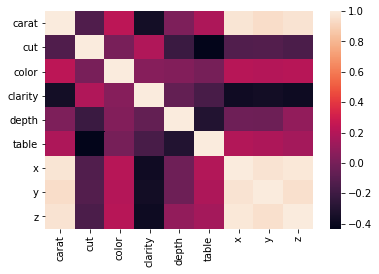

In [41]:
sns.heatmap(correlation_matrix)

In [42]:
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features 

{'x', 'y', 'z'}

In [45]:
# Elimino estas tres variables del dataset por redundantes
dataCut = data.copy()

dataCut.drop(correlated_features, axis=1, inplace=True)

In [46]:
dataCut.head()

,carat,cut,color,clarity,depth,table,price
0,0.78,4,0,4,61.5,58.0,3446
1,0.31,5,0,3,60.8,56.0,732
2,0.30,5,0,3,62.3,54.0,475
3,1.04,5,0,5,62.0,58.0,9552
4,0.65,5,1,3,61.4,55.0,1276


In [47]:
X = dataCut.drop("price", axis=1)
y = dataCut["price"]

In [53]:
rf_reg = RandomForestRegressor(n_estimators=15, max_depth=3, min_samples_leaf=3, random_state=111)
#selector = RFECV(rf_reg, step=1, cv=5)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [57]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

In [60]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, rf_reg.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_reg.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_reg.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('R2', r2_score(y_test, rf_reg.predict(X_test)))

METRIC SUMMARY
MSE 1652651.575196213
RMSE 1285.5549677848135
MSLE 0.06823190157040655
MAE 734.3899377481257
R2 0.8965152229398851


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 15.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [72]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [73]:
print('METRIC SUMMARY')
print('MSE', mean_squared_error(y_test, rf_random.predict(X_test)))
print('RMSE', np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test))))
print('MSLE', mean_squared_log_error(y_test, rf_random.predict(X_test)))
print('MAE', mean_absolute_error(y_test, rf_random.predict(X_test)))
print('R2', r2_score(y_test, rf_random.predict(X_test)))

METRIC SUMMARY
MSE 661312.4189915588
RMSE 813.2111773651164
MSLE 0.01969585136377431
MAE 438.6392233879714
R2 0.9585903228039452
